# Common project

## Project Description

Within the project for the online store "Streamchik", an analysis of historical data on the sales of computer games, user and expert ratings, as well as information on genres, platforms, and age ratings of games is being conducted. The goal of the project is to identify factors that determine the success of games in order to bet on potentially popular products and plan advertising campaigns.

The data used covers the period up to 2016. Let's assume that the current moment is December 2016, and there is a need to plan a campaign for the next year. It is important to work with the data principles, regardless of whether sales are forecasted for 2017 based on 2016 data or for 2027 based on 2026 data.

The data also includes the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. ESRB evaluates game content and assigns appropriate age categories, such as "Mature", "Early Childhood", or "Teen", to the games.

## 1 Open the data file and review the general information

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
# Disable all warnings
warnings.filterwarnings("ignore")

In [3]:
games = pd.read_csv(r'datasets/04_games.csv')
display(games)
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The dataset contains 16,715 entries and 11 columns. These columns represent different characteristics of the data, such as the game's name, platform, year of release, genre, sales in North America, Europe, Japan, and other countries, critic scores, user scores, and ESRB rating.

Several columns have missing values. Specifically, the "Name" column has 2 missing values, the "Year_of_Release" column has 269 missing values, the "Genre" column has 2 missing values, the "Critic_Score" column has 8,578 missing values, the "User_Score" column has 6,701 missing

## 2 Data preprocessing

### Let's standardize the names to a uniform format.

In [4]:
games.columns = games.columns.str.lower()

In [5]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Processing of omissions

In [6]:
def empty_values(games):
    count_missing = games.isna().sum()
    percent_missing = round(games.isna().sum() * 100 / len(games), 2)
    
    missing_value_games = pd.DataFrame({'Имя столбца': games.columns,
                                     'Пропусков': count_missing,
                                     '% пропусков': percent_missing})
    
    return missing_value_games
empty_values(games).sort_values(by='% пропусков', ascending=False)

,Имя столбца,Пропусков,% пропусков
critic_score,critic_score,8578,51.32
rating,rating,6766,40.48
user_score,user_score,6701,40.09
year_of_release,year_of_release,269,1.61
name,name,2,0.01
genre,genre,2,0.01
platform,platform,0,0.00
na_sales,na_sales,0,0.00
eu_sales,eu_sales,0,0.00
jp_sales,jp_sales,0,0.00


Most of the omissions are in the ratings, there are also minor omissions in the year, titles and genre

We will not be able to restore the lines with the names and still all two lines. You can simply delete them

In [7]:
games = games.dropna(subset = ['name']) 

In [8]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [9]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are too many rows to fill in manually and at the same time their share of the total array is very small (1.7%). You can also simply delete this data.

In [10]:
games = games.dropna(subset = ['year_of_release']) 

In [11]:
games.drop_duplicates().reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# viewing the unique values of the user rating column
print(games['user_score'].unique())

# view the unique values of the critics' score column
print(games['critic_score'].unique())

# viewing the unique values of the rating column from the ESRB
print(games['rating'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In addition to the omissions, the abbreviation tbd appears in the user rating. Stands for to be determined, or "to be determined". If this applies only to old games, perhaps this type of rating has not yet existed, and if new, perhaps the rating has not yet been taken into account.

In [14]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


We see that the games are presented in different years, which means that in this case this value is equated to a skip in the data

In [15]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)


The data is skipped only in the rating and rating columns, so it is impractical to delete rows with missing values in them

In [16]:
# Rating. If the field is not filled in, replace Unknown
print('Checking for gaps before processing: ', games['rating'].isna().sum())
games.loc[games['rating'].isna(), 'rating'] = "Unknown"
print('Checking for gaps after processing:', games['rating'].isna().sum())

Checking for gaps before processing:  6676
Checking for gaps after processing: 0


We have filled in the gaps in the rating on Unknown, this is necessary for more accurate research on genres and data on games without a rating at the next stages of work

### Сonvert the data to the desired types

In [17]:
def describe_colums(games):
    
    values = pd.DataFrame()
    
    for col in games.columns:
        values[col] = [games[col].unique(), games[col].dtypes, games[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Value', 1: 'Data Type', 2: 'Unique Values'}, axis=1)

describe_colums(games)

,Value,Data Type,Unique Values
year_of_release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989....",float64,37
na_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.2...",float64,401
eu_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, ...",float64,307
jp_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9...",float64,244
other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84...",float64,155
critic_score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0...",float64,81
name,"[Wii Sports, Super Mario Bros., Mario Kart Wii...",object,11426
platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...",object,31
genre,"[Sports, Platform, Racing, Role-Playing, Puzzl...",object,12
user_score,"[8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7....",object,95


The release year must be an integer

User rating should be float

In [18]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


In [19]:
def describe_colums(games):
    
    values = pd.DataFrame()
    
    for col in games.columns:
        values[col] = [games[col].unique(), games[col].dtypes, games[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Value', 1: 'Data Type', 2: 'Unique Values'}, axis=1)

describe_colums(games)

,Value,Data Type,Unique Values
year_of_release,"[2006, 1985, 2008, 2009, 1996, 1989, 1984, 200...",int32,37
na_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.2...",float64,401
eu_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, ...",float64,307
jp_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9...",float64,244
other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84...",float64,155
critic_score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0...",float64,81
user_score,"[8.0, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, ...",float64,95
name,"[Wii Sports, Super Mario Bros., Mario Kart Wii...",object,11426
platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...",object,31
genre,"[Sports, Platform, Racing, Role-Playing, Puzzl...",object,12


Everything is fine with the formats now. The year can only be integer, and ratings have values after the decimal point, and must also be in the same data format

### Let's calculate the total sales in all regions

In [20]:
games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


## 3 Research analysis of data

### Let's check how many games were released in different versions

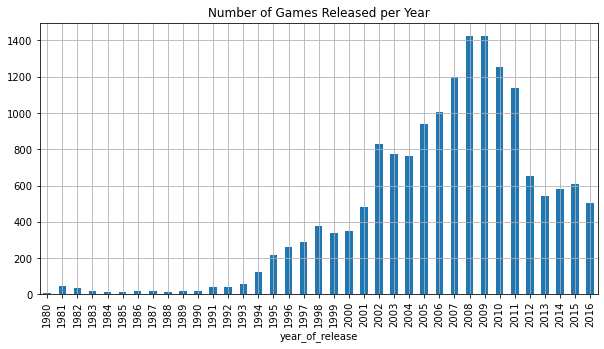

In [21]:
games.groupby('year_of_release')['name'].count().plot(grid=True, kind='bar',figsize=(10, 5))
plt.title("Number of Games Released per Year")
plt.show()

In [22]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

We see that until the 90s, games were released in large quantities, single games were released, and since the 90s their number has been growing and reached peak values in 2008-2009x. Then there was a decline to 502 games in 2016. In general, the data at the dawn of the development of the gaming industry before 1994 could be neglected

In [23]:
# discarding outliers
games=games[(games.sum_sales < 94)]
# using the histogram, we select columns with a normal distribution
games=games[(games.year_of_release > 2002) & (games.year_of_release < 2016)]

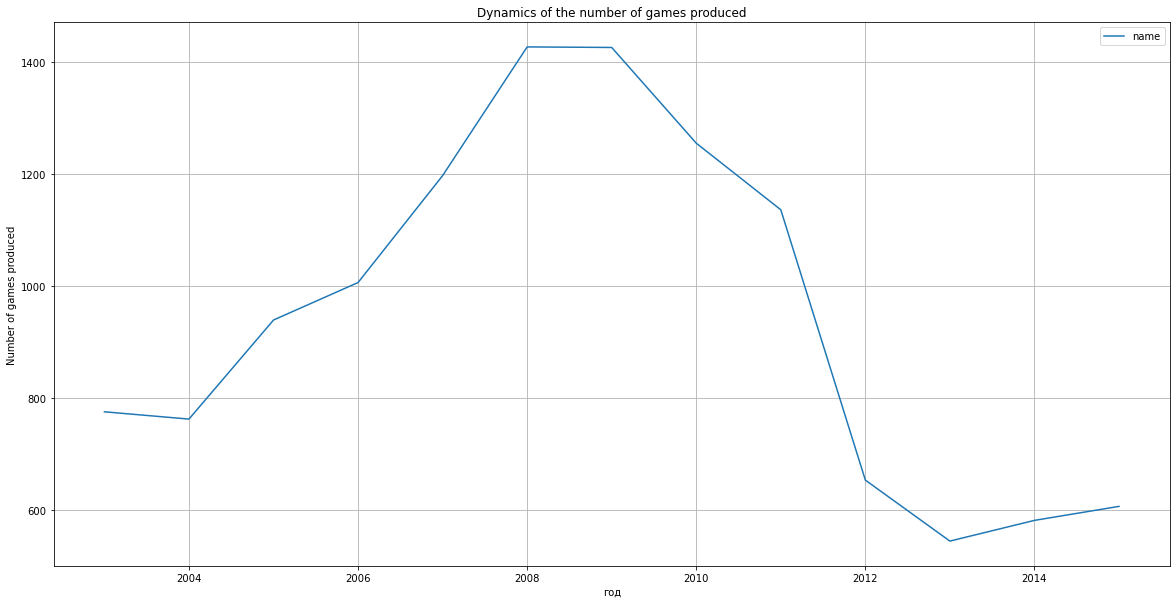

In [25]:
ax = games\
    .groupby('year_of_release') \
    .agg({'name':'count'})\
    .plot(grid =True,  figsize=(20,10))\
    .set(title = 'Dynamics of the number of games produced', xlabel = 'год', ylabel = 'Number of games produced')

### Let's check how sales have changed across platforms

In [26]:
games.groupby(by='platform').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head()

,sum_sales
platform,
X360,959.72
PS3,927.74
Wii,891.00
PS2,822.58
DS,802.76


The most popular platform is PlayStation2, followed by X360, PS3, Wii, DS.

Text(0.5, 1.0, 'PS2')

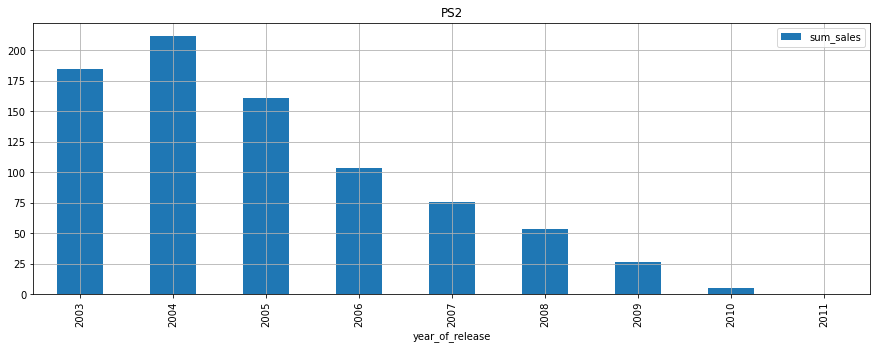

In [27]:
# we build histograms of total sales by year for the 5 most popular platforms.
(games
    .query('platform=="PS2"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('PS2') 



PS2 has been gaining popularity since 2000 and from 2004 to 2011 it was losing its popularity. The cycle is about 10 years.

Text(0.5, 1.0, 'X360')

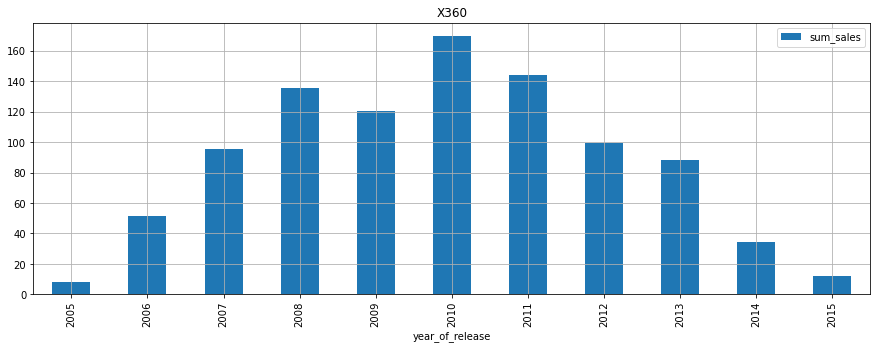

In [28]:
(games
    .query('platform=="X360"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('X360')


The X360 has been gaining popularity since 2005 and has been losing its popularity from 2010 to 2016. The cycle is about 10 years

Text(0.5, 1.0, 'PS3')

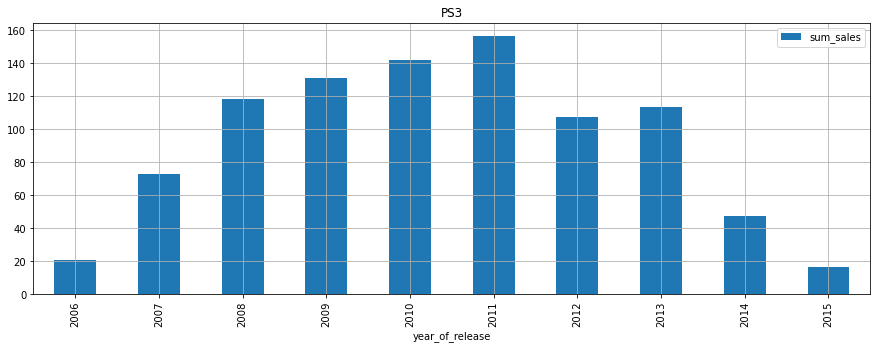

In [29]:
(games
    .query('platform=="PS3"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('PS3')

The PS3 has been gaining popularity since 2006 and has been losing its popularity from 2011 to 2016. Cycle of 10 years

Text(0.5, 1.0, 'DS')

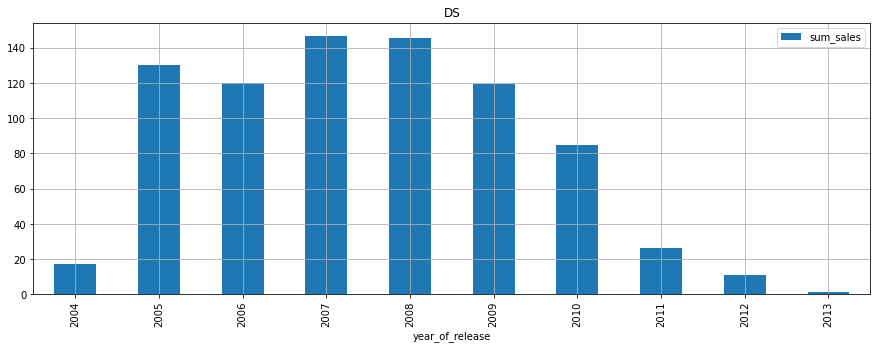

In [32]:
(games
    .query('platform=="DS"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('DS')


DS has been gaining popularity since 1985 and from 2008 to 2013 was losing its popularity. The cycle is already 28 years.

Text(0.5, 1.0, 'Wii')

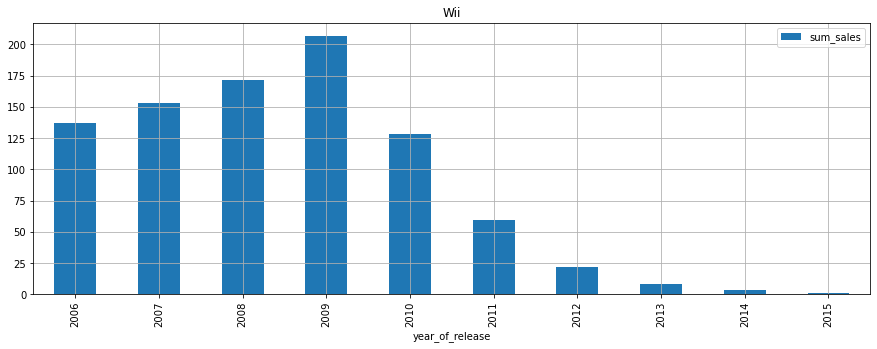

In [33]:
(games
    .query('platform=="Wii"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(15, 5))
)
plt.title('Wii')

Wii was immediately a popular platform from 2006 until 2009, then there was also a decline and from 2012 until about 2016 it was practically not sold. The total cycle is also about 10 years

We conclude that, on average, it usually takes about 10 years from the appearance to the disappearance of the platform. The exception is DS, apparently the olds did not change one of the first gaming platforms for a long time :)

### Let's check which platforms are leading in sales, growing or falling

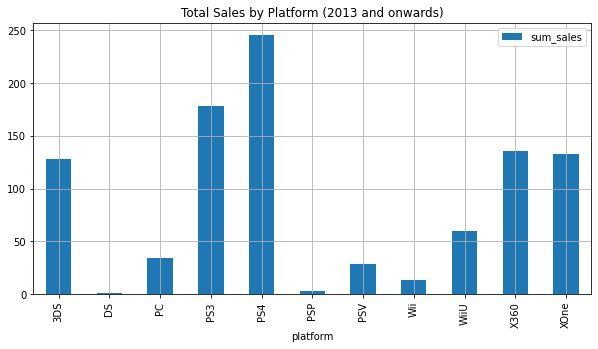

In [35]:
# we take the period from 2013, we will consider it relevant for building a further forecast period
games.query('year_of_release > 2012').pivot_table(index='platform', values='sum_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(10, 5))
plt.title("Total Sales by Platform (2013 and onwards)")
plt.show()

We have identified such a period, as the gaming industry is quite dynamic.PS3 and PS4 are definitely leading in the ranking.

In [36]:
new_platform = games.query('year_of_release > 2012')

In [37]:
new_platform_search = (new_platform.groupby(['platform'],as_index = False)['sum_sales'].sum()
                                 .sort_values('sum_sales',ascending = False)
                           )
new_platform_search

,platform,sum_sales
4,PS4,244.89
3,PS3,177.83
9,X360,135.28
10,XOne,133.17
0,3DS,128.11
8,WiiU,60.03
2,PC,34.18
6,PSV,28.74
7,Wii,13.48
5,PSP,3.50


In [38]:
name_plat = new_platform_search['platform'].head(8).tolist()
name_plat

['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']

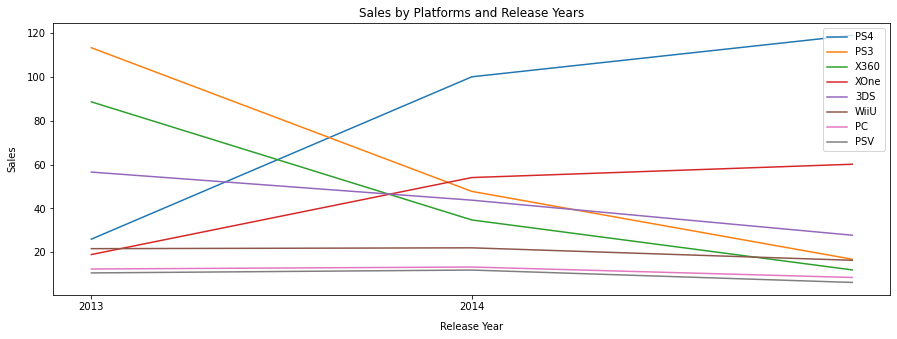

In [44]:
for name in name_plat:
    new_platform.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'sum_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['sum_sales'].plot(figsize=(15, 5), label = name)
    
    plt.xticks(np.arange(2013, 2015, step=1))
    plt.xlabel('Release Year', labelpad = 10)
    plt.ylabel('Sales', labelpad = 10)
    plt.legend()
    plt.title("Sales by Platforms and Release Years")


With such visualization, it is clearly visible which platforms are on a bigger decline and which are on a smaller one. For example, PS3 has given way to PS4 over the past 3 years, the XOne platform is also gaining momentum, most likely, it will only grow in volume.

### Visualization of the "box with a mustache" chart on global game sales by platform.

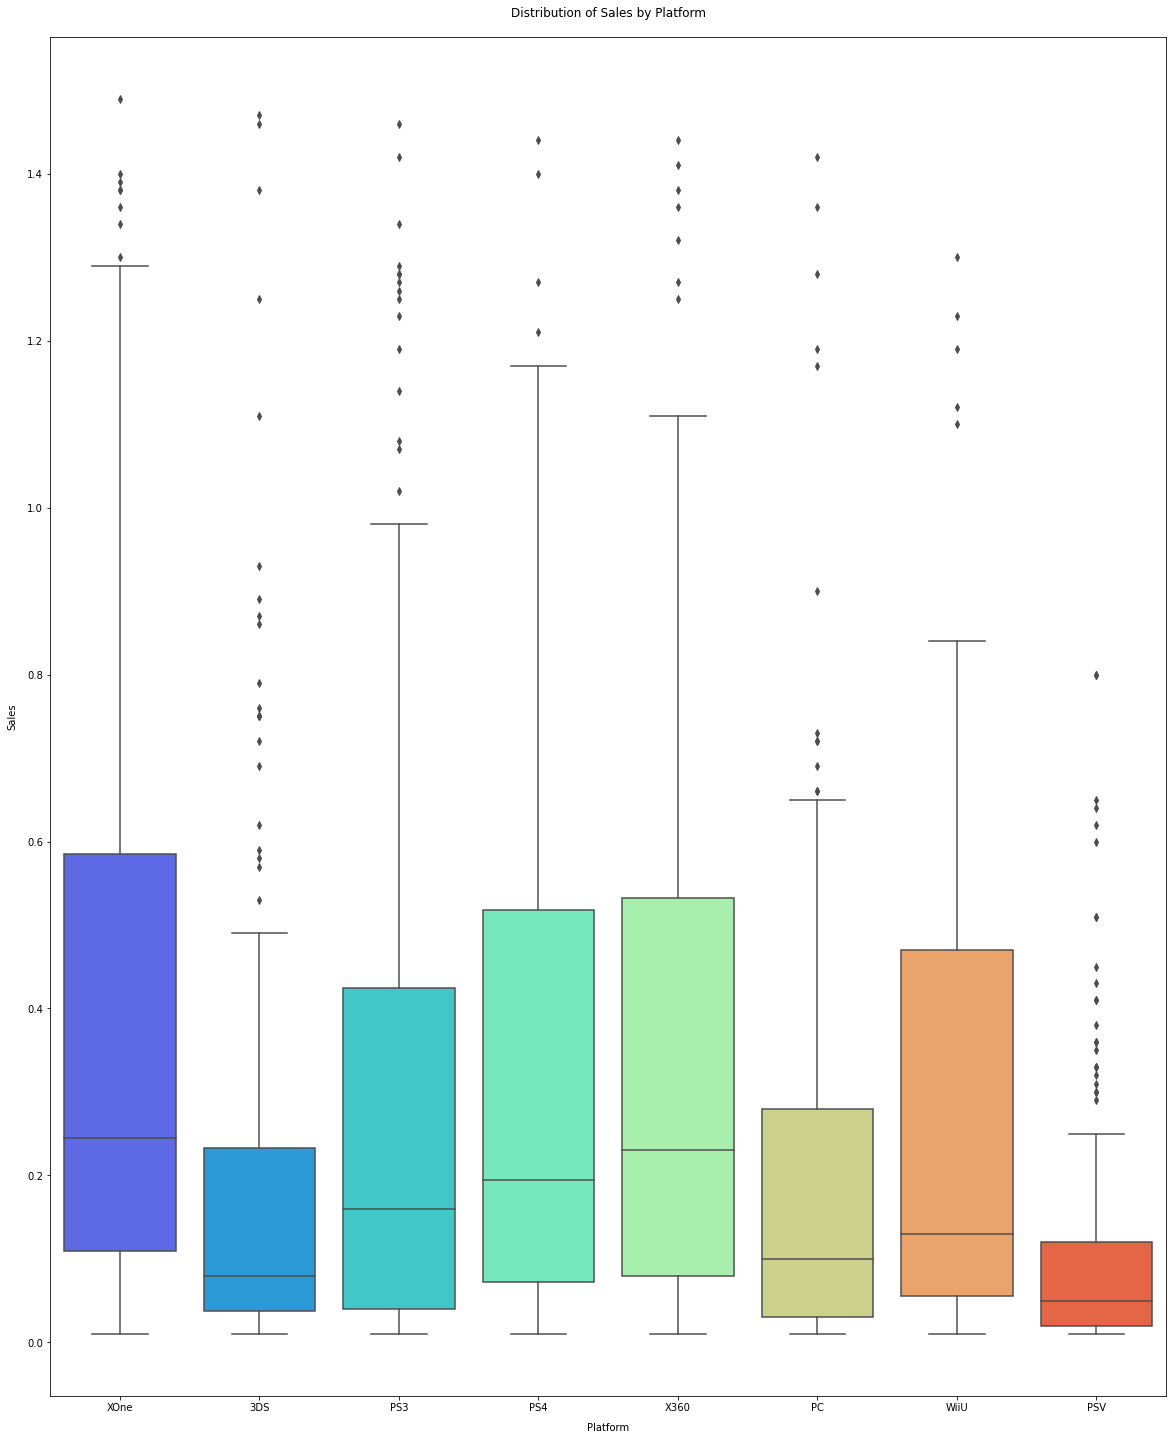

In [51]:
plt.figure(figsize=(20, 25))
sns.boxplot(data=new_platform.query('platform.isin(@name_plat) and sum_sales < 1.5'), x="platform", y="sum_sales", palette='rainbow')

plt.xlabel('Platform', labelpad=10)
plt.ylabel('Sales', labelpad=10)
plt.title('Distribution of Sales by Platform', pad=20)
plt.show()

Based on the "Box with a Mustache" chart, we see that the X360 and XOne platforms are in the lead.

### Impact on PS4 sales of user reviews and critics

In [52]:
ps4 = games.query("platform == 'PS4'")

In [53]:
# consider the correlation between valuation and sales
corr = ps4[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.612451,0.442219,0.370752,0.309165
user_score,0.612451,1.000000,0.035654,-0.001902,0.225118
na_sales,0.442219,0.035654,1.000000,0.810579,0.530825
eu_sales,0.370752,-0.001902,0.810579,1.000000,0.539344
jp_sales,0.309165,0.225118,0.530825,0.539344,1.000000


We see a small pattern between critics' and users' ratings. However, it is logical to assume that the connection is with the quality of the game, and not that if critics give a big rating, then this affects the user's rating.

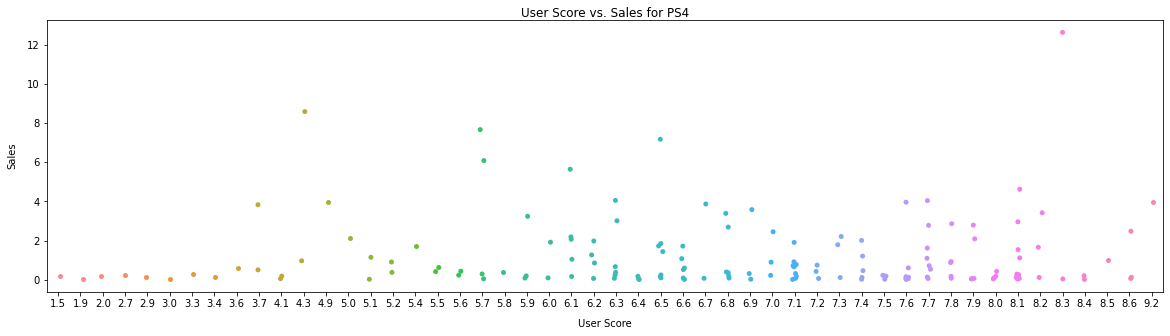

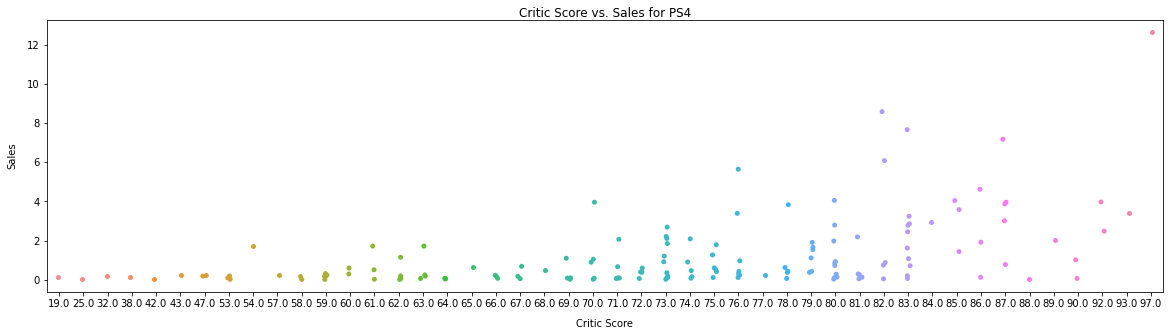

In [60]:
#visualize graphically
plt.figure(figsize=(20, 5))
sns.stripplot(x='user_score', y='sum_sales', data=ps4, jitter=True)
plt.xlabel('User Score', labelpad=10)
plt.ylabel('Sales', labelpad=10)
plt.title('User Score vs. Sales for PS4', pad=1)

plt.figure(figsize=(20, 5))
sns.stripplot(x='critic_score', y='sum_sales', data=ps4, jitter=True)
plt.xlabel('Critic Score', labelpad=10)
plt.ylabel('Sales', labelpad=10)
plt.title('Critic Score vs. Sales for PS4', pad=1)

plt.show()

The relationship between user rating and sales is not observed, there is a connection between critics' ratings and sales, but it is insignificant. Although, games are bought less often below the average market.

### Correlating findings with game sales on other platforms

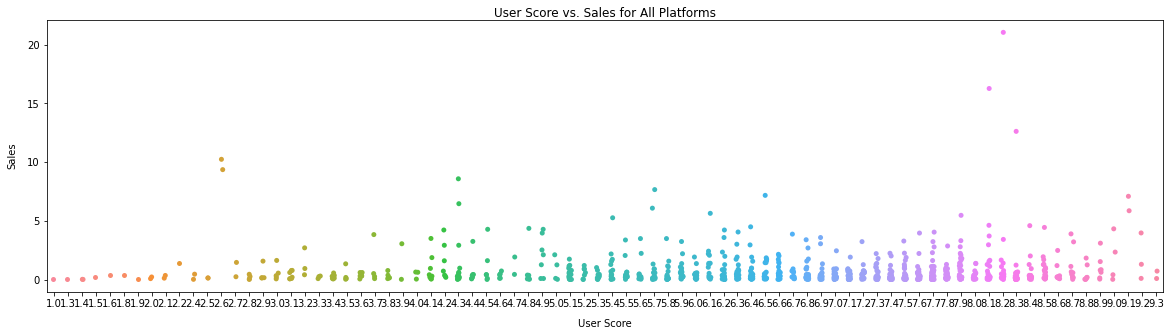

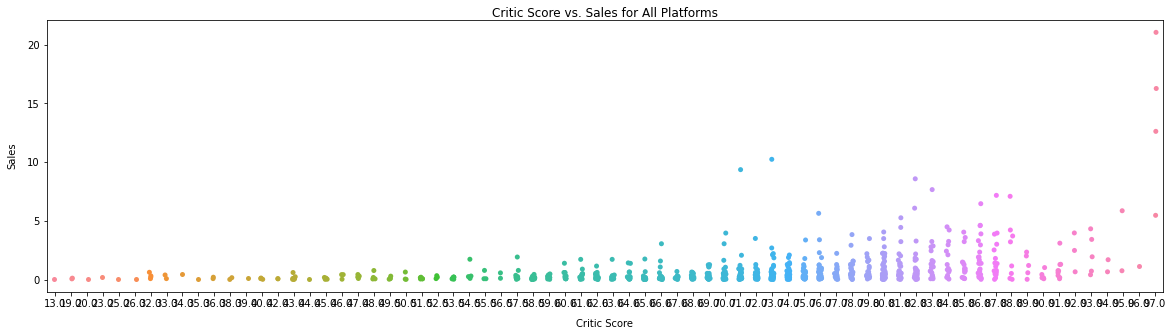

In [61]:
plt.figure(figsize=(20, 5))
sns.stripplot(x='user_score', y='sum_sales', data=new_platform, jitter=True)
plt.xlabel('User Score', labelpad=10)
plt.ylabel('Sales', labelpad=10)
plt.title('User Score vs. Sales for All Platforms', pad=1)

plt.figure(figsize=(20, 5))
sns.stripplot(x='critic_score', y='sum_sales', data=new_platform, jitter=True)
plt.xlabel('Critic Score', labelpad=10)
plt.ylabel('Sales', labelpad=10)
plt.title('Critic Score vs. Sales for All Platforms', pad=1)

plt.show()

The higher the score, the more sales, and it doesn't matter whether the user or the critic rated the game. And also the most expensive sales come from the highest ratings of critics. Although, perhaps this is one of the marketing techniques. Games with high critical acclaim may be subject to aggressive marketing.

When compared with the dependence of sales on the rating, the user rating affects sales slightly higher on other gaming platforms than on PS4.

Players prefer to buy games with a rating above 70, which repeats the situation with PS4

### Сonsider the general distribution of games by genre

In [62]:
print(games.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head())
print(games.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).tail())

              sum_sales
genre                  
Action          1316.04
Sports           949.42
Shooter          794.37
Misc             668.18
Role-Playing     616.84
            sum_sales
genre                
Simulation     299.79
Fighting       244.15
Adventure      156.73
Puzzle         121.09
Strategy        92.36


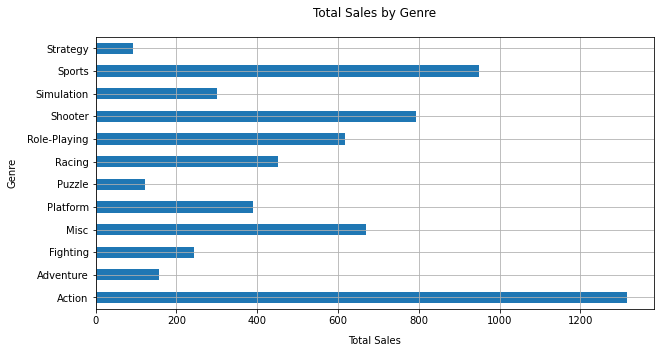

In [64]:
plt.figure(figsize=(10, 5))
games.groupby('genre')['sum_sales'].sum().plot(grid=True, kind='barh')
plt.xlabel('Total Sales', labelpad=10)
plt.ylabel('Genre', labelpad=10)
plt.title('Total Sales by Genre', pad=20)

plt.show()


The most popular genres of games are action, sports, shooters, arcade games and role-playing games.

Smaller sales for simple games. Perhaps this is due to the fact that the games are completely different, sales from GTA will be thousands of times higher than that of puzzles, since as a copy of the game has a fundamentally different cost.

In [65]:
games.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


Using the example of GTA, we see that the total sales of the game are almost 100 million

In [66]:
genre_sales = games.pivot_table(index='genre', values='sum_sales', columns = 'year_of_release', aggfunc = 'sum', fill_value=0, margins=True).reset_index()
genre_sales = genre_sales[:-1]
genre_sales = genre_sales.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)

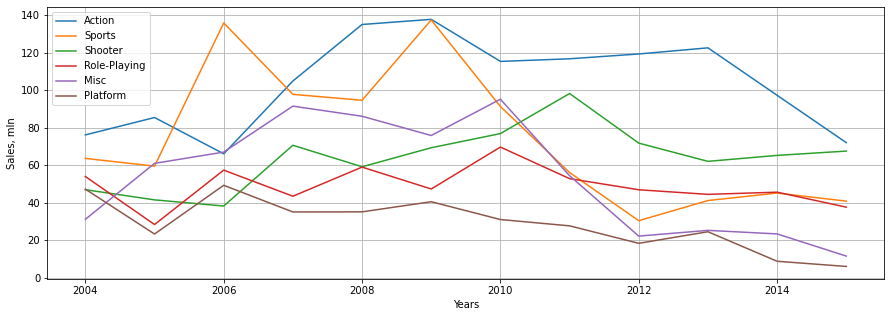

In [67]:
 plt.figure(figsize=(15, 5))
for i in ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc', 'Platform']:
    plt.plot(genre_sales.loc[i, list(genre_sales.columns[1:-1])].T, label=i)
plt.xlabel('Years')
plt.ylabel('Sales, mln')
plt.grid()
plt.legend(loc='upper left')
plt.show()

If we consider the games in the period, we see a rather uneven distribution over the years, and also that the Action is declining in the rating, and Shooters on the contrary are growing, so, in the last year, these two genders have almost equaled. Peak values are also visible on the chart, you should look at the median values and standard deviations in sales by genre.

In [68]:
 display(games
        .pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'sum_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,sum_sales,sum_sales,sum_sales,sum_sales,sum_sales
8,Shooter,794.37,0.838828,0.24,1.834813,947
10,Sports,949.42,0.606271,0.22,2.500946,1566
4,Platform,389.86,0.694938,0.22,2.080165,561
2,Fighting,244.15,0.466826,0.19,0.882079,523
0,Action,1316.04,0.493824,0.18,1.114014,2665
6,Racing,452.29,0.569635,0.17,1.821422,794
7,Role-Playing,616.84,0.550259,0.16,1.338445,1121
3,Misc,668.18,0.453311,0.15,1.381409,1474
9,Simulation,299.79,0.435741,0.15,1.276582,688


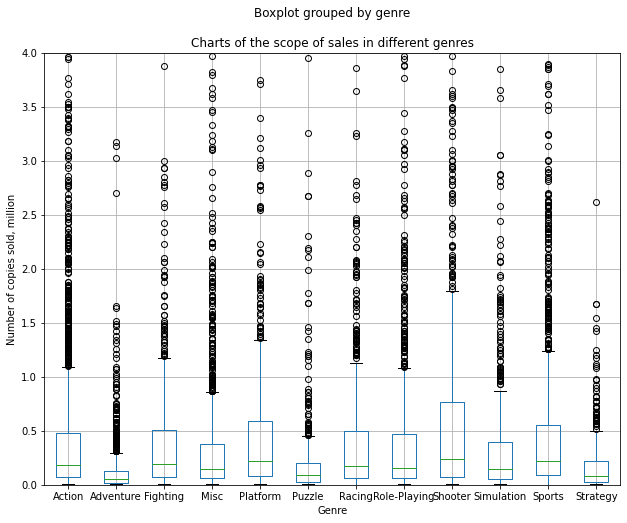

In [69]:
# visualizing using a box with a mustache
(games[['sum_sales', 'genre']].boxplot(column='sum_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Genre')
plt.ylabel('Number of copies sold, million')
plt.title('Charts of the scope of sales in different genres')
plt.ylim(0, 4)
plt.show()

Indeed, if we look at the average cost of the game, then shooters, sports games and platformers are in the lead (which were invisible in general sales). Action takes only the fifth place.

At the same time, the average and median values are very different from each other, which suggests that all genres have their own stars and failed projects.

##  Portrait of the user of each region

<AxesSubplot:title={'center':'JP'}, ylabel='platform'>

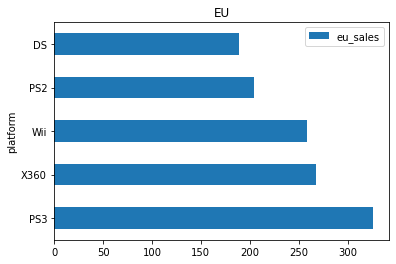

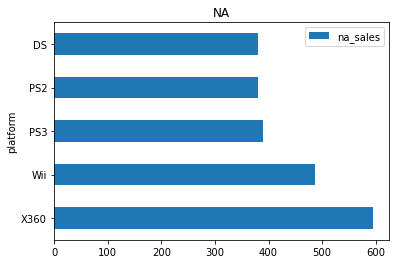

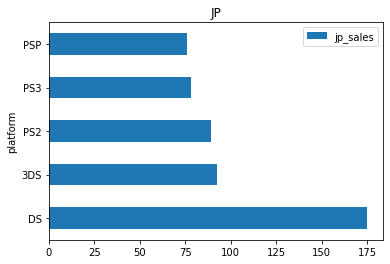

In [70]:
# let's make histograms by region
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh', title='EU')
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh', title='NA')
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh', title='JP')

We see how the region influences the choice of platform, Europe prefers PS3, while North America prefers X360, Japan remains loyal to DS. At the same time, PS 2 and 3 series are popular in any region.

<AxesSubplot:title={'center':'JP'}, ylabel='genre'>

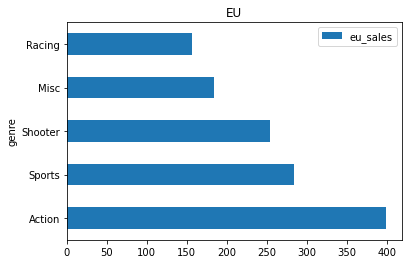

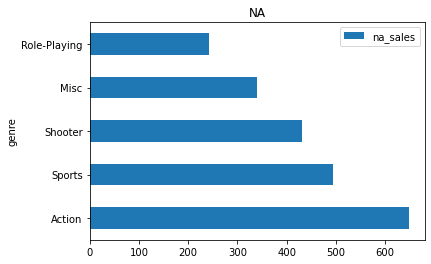

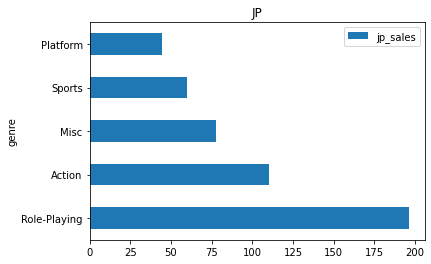

In [71]:
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh', title='EU')
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh', title='NA')
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh', title='JP')

Europe and Latin America prefer to play action games, while Japan prefers role-playing games. Most likely, this is due to the mentality of users from different regions, it is significantly different for the Japanese. EU and NA have very similar preferences for the game.

<AxesSubplot:title={'center':'JP'}, ylabel='rating'>

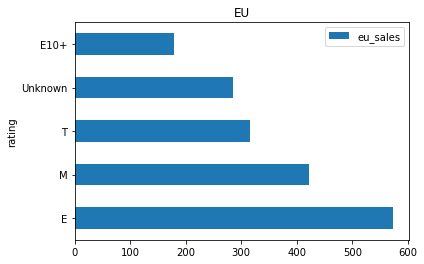

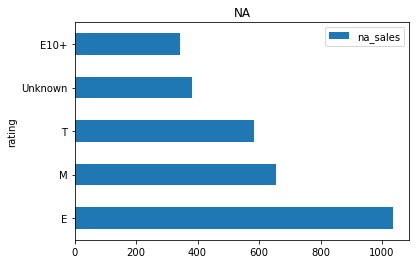

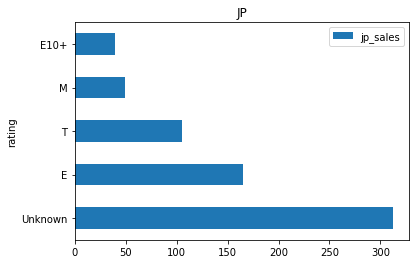

In [72]:
games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh', title='EU')
games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh', title='NA')
games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh', title='JP')

Dependence on the rating is tracked in Europe and North America. The most popular games with a rating of "for everyone", in second place are games for an adult audience, the Japanese prefer games without a rating more.

## Let 's test hypotheses

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Let's reformulate the hypotheses:

H0. The average user ratings of the Xbox One and PC platforms are the same.

H1. The average user ratings of the Xbox One and PC platforms are different.

In [74]:
x_one = new_platform.query("platform == 'XOne'")
pc = new_platform.query("platform == 'PC'")

print("XOne sample variance",np.var(x_one['user_score']))
print("PC sample variance",np.var(pc['user_score']))

XOne sample variance 1.6451872770511302
PC sample variance 3.0387966942148776


The variances are not equal

In [80]:
alpha = 0.05  # level of statistical significance

results = st.ttest_ind(
    x_one['user_score'],
    pc['user_score'],
    equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis, i.e. the average user ratings of the Xbox One and PC platforms differ")
else:
    print("We failed to reject the null hypothesis, the average user ratings of the Xbox One and PC platforms are the same")


p-value: nan
We failed to reject the null hypothesis, the average user ratings of the Xbox One and PC platforms are the same


We failed to reject the null hypothesis, as the p-value is not less than the chosen level of significance (alpha = 0.05). Therefore, we conclude that there is not enough evidence to suggest that the average user ratings of the Xbox One and PC platforms differ significantly.

In [82]:
# compare the average ratings
print('{:} {: >5.2f}'.format("Average user rating of Xbox One platforms:", x_one['user_score'].mean() ))
print('{:} {: >11.2f}'.format("Average user rating of PC platforms:",pc['user_score'].mean() ))

Average user rating of Xbox One platforms:  6.48
Average user rating of PC platforms:        6.26


The test confirmed the hypothesis of equality of ratings.

### The average user ratings of the Action and Sports genres are different.

We reformulate the hypotheses:

H0. Average user ratings of the genres Action and Sports are the same.

H1. Average user ratings of genres Action and Sports are different.

In [83]:
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
if np.var(action)==np.var(sports):
    print('True')
else:
    print('False')

False


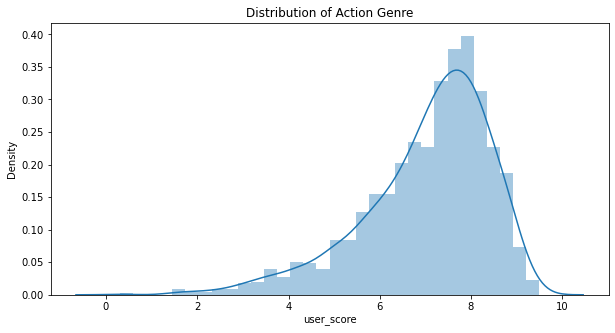

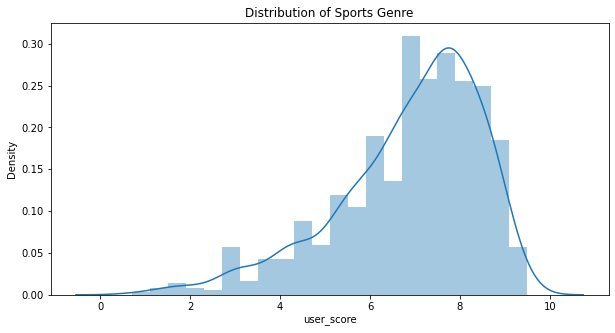

In [88]:
plt.figure(figsize=(10, 5))
sns.distplot(action)
plt.title('Distribution of Action Genre')
plt.show()

plt.figure(figsize=(10, 5))
sns.distplot(sports)
plt.title('Distribution of Sports Genre')
plt.show()

In [89]:
results=st.ttest_ind(action, sports, equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

p-value: 0.01250834944250293
Reject null hypothesis


The average user ratings of the genres Action and Sports are different.

# Сonclusion

The gaming industry market has been growing since 1994 and since 2010 there has been a decline in sales. Platforms appear and die within 10 years. The most popular and promising platforms at the moment are Sony PlayStation 4 and Xbox One. Sales depend significantly on the genre of the game, for example, GTA5, which are in the top sales on all presented platforms and the total profit is almost $ 100 million. At the same time, if we consider the average cost of a copy or the median cost by genre, then the shooter genre is in the lead, and if we look at total sales, then action. In the USA and Europe, shooters, sports games and action games are best sold, while Japan prefers role-playing games. Most of the sales in Europe and Latin America are for games with a rating for adults and for everyone, Japan is different again, gamers prefer games without a rating. Japan is a separate market with a focus on portable consoles. The volume of sales in this country is 2.5 times less than in Europe and America.

It is potentially advantageous to develop a game for the European and American markets on promising Sony PlayStation 4 and Xbox One platforms in the Shooter/Sport genre, while platformers also occupy their impressive segment. The Japanese market has its own specifics on platforms and genres, in addition, it is not too extensive.